Basic info about `airlines.csv`, `airports.csv`, and `geo_routes.csv`

In [1]:
import pandas as pd
airlines = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/airlines.csv')
airports = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/airports.csv')
routes  = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/geo_routes.csv')

print(airports.iloc[0])
print(airlines.iloc[0])
print(routes.iloc[0])

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
airline           2B
source           AER
dest             KZN
equipment        CR2
start_lon    39.9566
end_lon      49.2787
start_lat    43.4499
end_lat      55.6062
Name: 0, dtype: object


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)


we need to 3D to Cartsesian Coord using `Series.tolist()` method

In [4]:
m = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)


scatter plot `basemap.scatter(x,y, s=10)` 

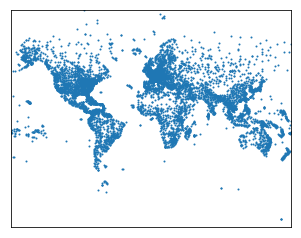

In [6]:
m = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)

# large marker
# m.scatter(x,y,s=10)
# smaller marker
# m.scatter(x,y, s=5)
m.scatter(x,y, s=1)

draw the coastline using `basemap.drawcoastlines()`

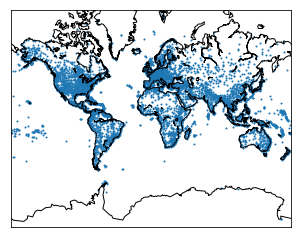

In [9]:
m = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)

m.scatter(x,y, s=1)
m.drawcoastlines()
plt.show()

- `pyplot.subplots()` to specify the `figsize`
- use `Axes.set_title() 

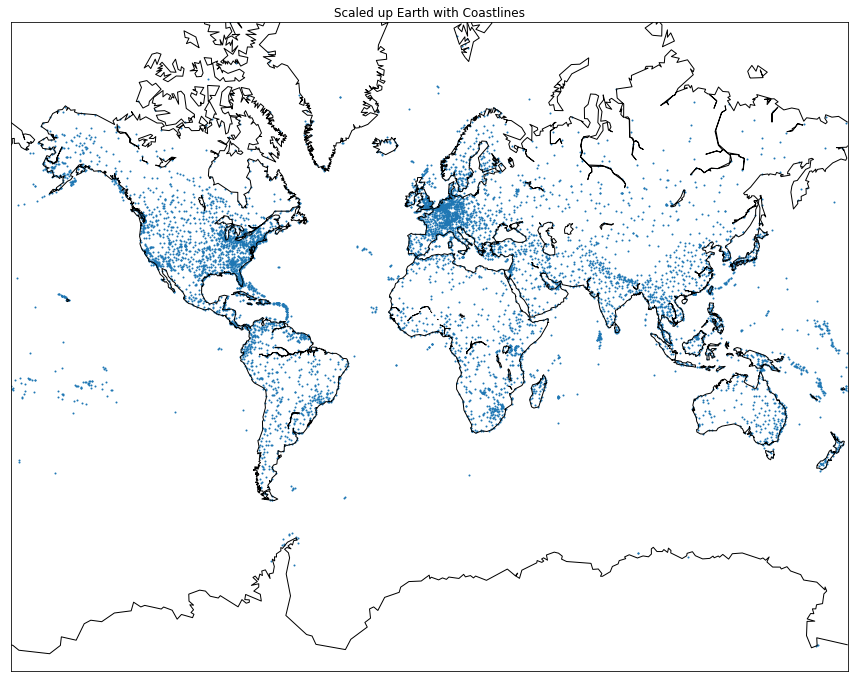

In [18]:
fig, ax = plt.subplots(figsize=(15,20))
ax.set_title('Scaled up Earth with Coastlines')
#or
# fig, ax = plt.subplots(figsize=(15,20))
# plt.title('Scaled up Earth with Coastlines')

m = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports['longitude'].tolist()
latitudes = airports['latitude'].tolist()
x, y = m(longitudes, latitudes)

m.scatter(x,y, s=1)
m.drawcoastlines()
plt.show()

In [20]:
import pandas as pd
geo_routes  = pd.read_csv('C:/Users/Stephen/Google Drive/Dataq/dq_datasets/geo_routes.csv')
geo_routes.info()
geo_routes.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


- using `basemap.drawgreatcircle()` to display great circle between 2 points
- `lon1` longitude of starting
- `lat1` latitude of starting
- `lon2` longitude of ending
- `lat2` latitude of ending

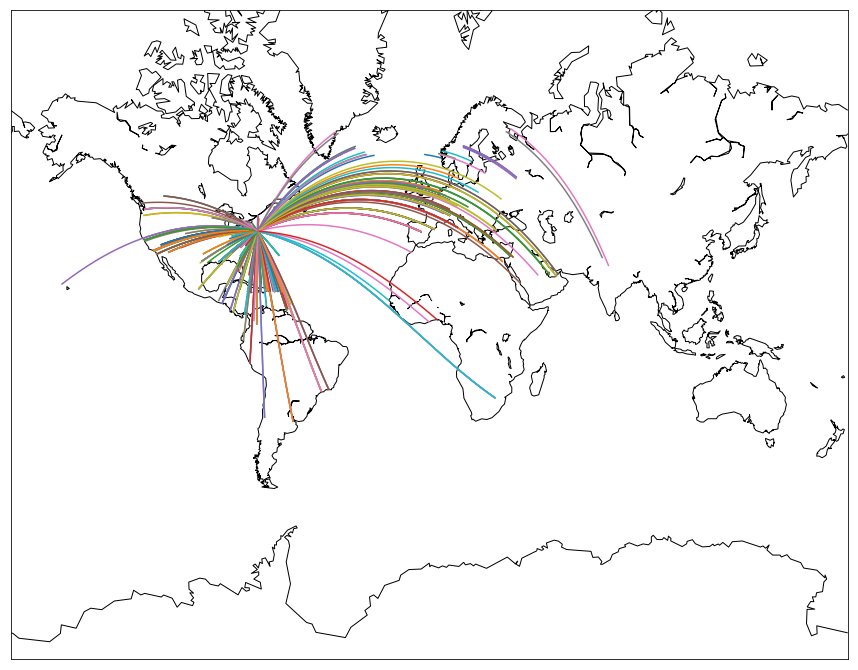

In [29]:
# example below
# m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
# m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
# m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
                
# dfw = geo_routes[geo_routes['source'] == 'DFW']
# create_great_circles(dfw)
jfk = geo_routes[geo_routes['source'] == 'JFK']
create_great_circles(jfk)
plt.show()